# CFS Exploratory Data Analysis

# Libraries

In [1]:
# Load required libraries 
import os
import csv
import zipfile
import string
import pandas as pd
import datetime as dt
from collections import Counter
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")
%matplotlib inline

# Load Dataset

In [2]:
# Load the data
fullpath = "../Datasets/Final_Data/Calls_for_Service_Cleaned.csv"
df_cfs = pd.read_csv(fullpath, sep=',')

In [3]:
df_cfs.head()

,NOPD_Item,Type_,TypeText,Priority,InitialType,InitialTypeText,InitialPriority,MapX,MapY,TimeCreate,...,SelfInitiated,Beat,BLOCK_ADDRESS,Zip,PoliceDistrict,Location,CrimeType,Description,Latitude,Longitude
0,A0026112,65,SIMPLE ROBBERY,1B,NaN,NaN,NaN,3680346,531912,2012-01-01 01:44:00,...,NaN,8D02,002XX N Rampart St,70112.0,8,"(29.956608537919635, -90.07170060793311)",VIOLENT CRIME,SIMPLE ROBBERY,29.956609,-90.071701
1,A0139412,65,SIMPLE ROBBERY,1B,NaN,NaN,NaN,3682307,529905,2012-01-01 20:04:00,...,NaN,8B01,003XX Canal St,70130.0,8,"(29.951030452997887, -90.06557853022184)",VIOLENT CRIME,SIMPLE ROBBERY,29.951030,-90.065579
2,A0163512,65,SIMPLE ROBBERY,2B,NaN,NaN,NaN,3682519,532977,2012-01-02 00:13:00,...,NaN,8E01,008XX Bourbon St,70116.0,8,"(29.9594709577918, -90.06480175675452)",VIOLENT CRIME,SIMPLE ROBBERY,29.959471,-90.064802
3,A0195712,65,SIMPLE ROBBERY,1B,NaN,NaN,NaN,3669570,518651,2012-01-02 09:12:00,...,NaN,2F04,009XX Bordeaux St,70115.0,2,"(29.92046691792707, -90.1061762712039)",VIOLENT CRIME,SIMPLE ROBBERY,29.920467,-90.106176
4,A0248912,65,SIMPLE ROBBERY,1B,NaN,NaN,NaN,3692359,543219,2012-01-02 17:25:00,...,NaN,5Q02,030XX Morrice Duncan Dr,70126.0,5,"(29.987329613283705, -90.03336254702)",VIOLENT CRIME,SIMPLE ROBBERY,29.987330,-90.033363


In [4]:
df_cfs.columns

Index([u'NOPD_Item', u'Type_', u'TypeText', u'Priority', u'InitialType',
       u'InitialTypeText', u'InitialPriority', u'MapX', u'MapY', u'TimeCreate',
       u'TimeDispatch', u'TimeArrive', u'TimeClosed', u'Disposition',
       u'DispositionText', u'SelfInitiated', u'Beat', u'BLOCK_ADDRESS', u'Zip',
       u'PoliceDistrict', u'Location', u'CrimeType', u'Description',
       u'Latitude', u'Longitude'],
      dtype='object')

In [5]:
# Drop unnecesary columns
colnames = ['Priority','Type_','TypeText','Location','BLOCK_ADDRESS','InitialType','PoliceDistrict','InitialTypeText','InitialPriority','MapX','MapY','Disposition','DispositionText','SelfInitiated', 'CrimeType']
df_cfs = df_cfs.drop(colnames, axis = 1)

In [6]:
df_cfs.head()

,NOPD_Item,TimeCreate,TimeDispatch,TimeArrive,TimeClosed,Beat,Zip,Description,Latitude,Longitude
0,A0026112,2012-01-01 01:44:00,1/1/2012 1:45,1/1/2012 1:47,1/1/2012 3:37,8D02,70112.0,SIMPLE ROBBERY,29.956609,-90.071701
1,A0139412,2012-01-01 20:04:00,1/1/2012 20:08,1/1/2012 20:10,1/1/2012 22:35,8B01,70130.0,SIMPLE ROBBERY,29.951030,-90.065579
2,A0163512,2012-01-02 00:13:00,1/2/2012 0:16,1/2/2012 0:23,1/2/2012 1:30,8E01,70116.0,SIMPLE ROBBERY,29.959471,-90.064802
3,A0195712,2012-01-02 09:12:00,1/2/2012 9:14,1/2/2012 9:24,1/2/2012 10:32,2F04,70115.0,SIMPLE ROBBERY,29.920467,-90.106176
4,A0248912,2012-01-02 17:25:00,1/2/2012 17:44,1/2/2012 17:52,1/2/2012 20:16,5Q02,70126.0,SIMPLE ROBBERY,29.987330,-90.033363


In [7]:
set(df_cfs.Description)

{'AGGRAVATED ASSAULT',
 'AGGRAVATED ASSAULT DOMESTIC',
 'AGGRAVATED BATTERY',
 'AGGRAVATED BATTERY BY KNIFE',
 'AGGRAVATED BATTERY BY SHOOTING',
 'AGGRAVATED BATTERY DOMESTIC',
 'AGGRAVATED CRIMINAL DAMAGE',
 'AGGRAVATED RAPE',
 'AGGRAVATED RAPE MALE VICTIM',
 'ARMED ROBBERY',
 'ARMED ROBBERY WITH GUN',
 'ARMED ROBBERY WITH KNIFE',
 'CARJACKING',
 'CARJACKING- NO WEAPON',
 'HOMICIDE',
 'HOMICIDE BY CUTTING',
 'HOMICIDE BY SHOOTING',
 'HOMICIDE DOMESTIC',
 'ORAL SEXUAL BATTERY',
 'SIMPLE RAPE',
 'SIMPLE RAPE MALE VICTIM',
 'SIMPLE ROBBERY'}

In [8]:
# Convert column type to datetime
df_cfs.TimeCreate = pd.to_datetime(df_cfs.TimeCreate)

In [9]:
len(df_cfs)

13927

# Feature generation

In [10]:
df_cfs['DOW'] = df_cfs.TimeCreate.dt.dayofweek
df_cfs['Month'] = df_cfs.TimeCreate.map(lambda x: x.month)
df_cfs['DOM'] = df_cfs.TimeCreate.map(lambda x: x.day)
df_cfs['Year'] = df_cfs.TimeCreate.map(lambda x: x.year)
df_cfs['Hour'] = df_cfs.TimeCreate.map(lambda x: x.hour)
df_cfs['DOY'] = df_cfs.TimeCreate.dt.dayofyear

In [11]:
df_cfs.head()

,NOPD_Item,TimeCreate,TimeDispatch,TimeArrive,TimeClosed,Beat,Zip,Description,Latitude,Longitude,DOW,Month,DOM,Year,Hour,DOY
0,A0026112,2012-01-01 01:44:00,1/1/2012 1:45,1/1/2012 1:47,1/1/2012 3:37,8D02,70112.0,SIMPLE ROBBERY,29.956609,-90.071701,6,1,1,2012,1,1
1,A0139412,2012-01-01 20:04:00,1/1/2012 20:08,1/1/2012 20:10,1/1/2012 22:35,8B01,70130.0,SIMPLE ROBBERY,29.951030,-90.065579,6,1,1,2012,20,1
2,A0163512,2012-01-02 00:13:00,1/2/2012 0:16,1/2/2012 0:23,1/2/2012 1:30,8E01,70116.0,SIMPLE ROBBERY,29.959471,-90.064802,0,1,2,2012,0,2
3,A0195712,2012-01-02 09:12:00,1/2/2012 9:14,1/2/2012 9:24,1/2/2012 10:32,2F04,70115.0,SIMPLE ROBBERY,29.920467,-90.106176,0,1,2,2012,9,2
4,A0248912,2012-01-02 17:25:00,1/2/2012 17:44,1/2/2012 17:52,1/2/2012 20:16,5Q02,70126.0,SIMPLE ROBBERY,29.987330,-90.033363,0,1,2,2012,17,2


# Time Series Analysis

Time Series Analysis of Violent crime committed from 2012 to 2016. 
- X-axis: Temporal feature
- Y-axis: Sum of Violent Crime from 2012-2016

## By Year

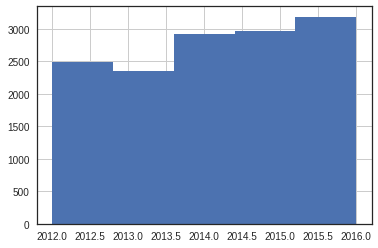

In [12]:
df_cfs.Year.hist(bins=5)

Inference: Violent crime has increased in the recent years

## By Month

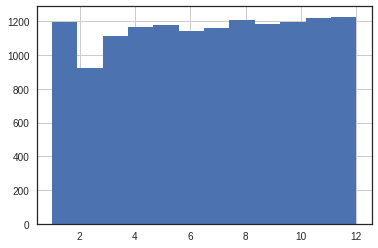

In [13]:
df_cfs.Month.hist(bins=12)

Inference:  Violent crime is approximately uniformly distributed over different months for past 5 years. We can't find strong evidence for special events like Mardi Gras, etc. that occur at specific time seems to have any correlation with Violent Crime.

## By Day of Month

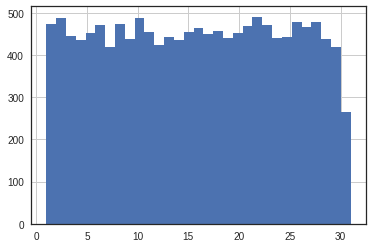

In [14]:
df_cfs.DOM.hist(bins=31)

Inference: Similar to the previous inference.

## By Day of Week

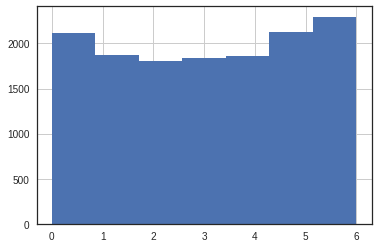

In [15]:
df_cfs.DOW.hist(bins=7)

Inference: Weekends have slighly higher violent crime frequency, but not considerably high.

## By Hour of Day

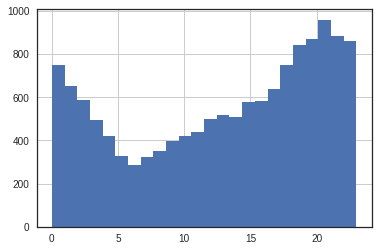

In [16]:
df_cfs.Hour.hist(bins=24)

Inference: The frequency of violent crimes committed at night is considerably higher than the ones committed during day time.

## By Day of Year

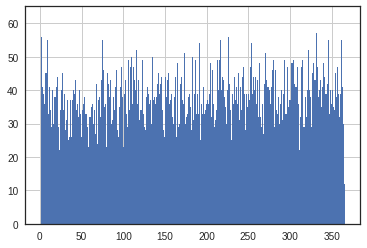

In [17]:
df_cfs.DOY.hist(bins=366)

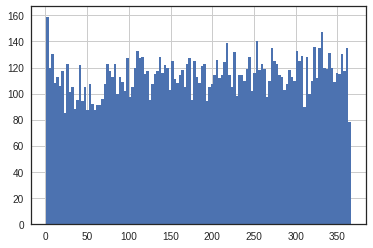

In [18]:
df_cfs.DOY.hist(bins=122)

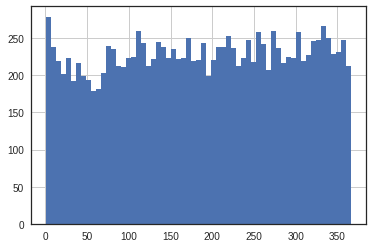

In [19]:
df_cfs.DOY.hist(bins=61)

Inference: The few occassional spikes could be further investigated to identify common features amongst those days.

### Have similar time series analysis for 2015 & 2016 (using better plots)

# Geospatial Analysis

In [20]:
import geopandas as gpd
import shapely
from geopy.geocoders import GoogleV3
import rtree
import fiona
import folium

In [21]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")
%matplotlib inline

### Load New Orleans Shapefile

In [25]:
filepath = "../Datasets/Raw_Data/Shared_by_NOPD/NOPD_Subzones_2017/NOPD_Subzones_2017.shp"
df_shpdata = gpd.read_file(filepath)

In [26]:
df_shpdata.head()

,ACTION_,AGENCY,CITY,District,EDITOR,MESSAGE,NAME,Name2,OBJECTID,OBJECTID_1,...,Sector,Sector2,Shape_Area,Shape_Le_1,Shape_Le_2,Shape_Le_3,Shape_Leng,Subzone,Zone,geometry
0,P,NP,NO,3,GGM,0.0,3C01,C01,1,1,...,1,31,5.798844e+06,12418.751299,12418.751299,12418.751299,12318.579534,1,3C,"POLYGON ((3665296.432821885 550208.6595408916,..."
1,P,NP,NO,3,GGM,0.0,3C02,C02,2,2,...,1,31,4.696720e+06,12096.460909,12096.460909,12096.460909,12096.460598,2,3C,"POLYGON ((3666344.54293038 552294.1196088046, ..."
2,P,NP,NO,3,GGM,0.0,3F02,F02,3,3,...,1,31,6.976348e+06,10410.986884,10410.986884,10410.986884,10410.986881,2,3F,"POLYGON ((3668990.553058296 552784.5097041428,..."
3,P,NP,NO,3,GGM,0.0,3J03,J03,4,4,...,1,31,4.471205e+06,8695.676383,8695.676383,8695.676383,8695.677038,3,3J,"POLYGON ((3670835.403043136 554526.9996574819,..."
4,P,NP,NO,3,GGM,0.0,3F01,F01,5,5,...,1,31,6.980741e+06,10547.095629,10547.095629,10547.095629,10547.096266,1,3F,"POLYGON ((3668918.712978885 552016.9994281381,..."


In [27]:
len(df_shpdata)

493

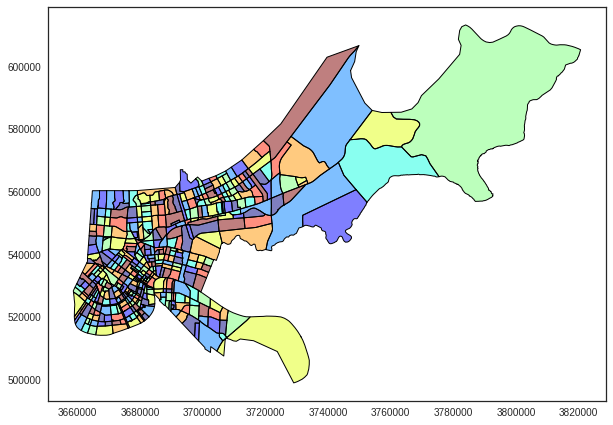

In [28]:
df_shpdata.plot(figsize=(10,10), cmap="jet");

### Load Census data of Louisiana

In [29]:
filepath = "../Datasets/Geospatial_Data/ACS_2015_5YR_BG_22.gdb.zip"
df_geodata = gpd.read_file(filepath)

In [30]:
df_geodata.head()

,ALAND,AWATER,BLKGRPCE,COUNTYFP,FUNCSTAT,GEOID,GEOID_Data,INTPTLAT,INTPTLON,MTFCC,NAMELSAD,STATEFP,Shape_Area,Shape_Length,TRACTCE,geometry
0,1612147.0,0.0,2,003,S,220039502002,15000US220039502002,+30.8236062,-092.6524471,G5030,Block Group 2,22,0.000152,0.053584,950200,(POLYGON ((-92.65962999982457 30.8246349999053...
1,49750853.0,71762.0,1,007,S,220070501001,15000US220070501001,+30.0394019,-091.0032215,G5030,Block Group 1,22,0.004660,0.294912,050100,(POLYGON ((-91.05096199989634 30.0343940000830...
2,34287918.0,753051.0,2,007,S,220070502002,15000US220070502002,+29.9461231,-091.2307052,G5030,Block Group 2,22,0.003275,0.354270,050200,(POLYGON ((-91.25987799966992 29.9879810001231...
3,102510910.0,0.0,1,007,S,220070504001,15000US220070504001,+29.9071901,-091.0786385,G5030,Block Group 1,22,0.009576,0.532666,050400,(POLYGON ((-91.15025899965309 29.9010939997883...
4,79224271.0,2890255.0,3,007,S,220070506003,15000US220070506003,+29.6900429,-091.0661396,G5030,Block Group 3,22,0.007655,0.414399,050600,"(POLYGON ((-91.10633500026 29.73417200033759, ..."


#### CountyFP For New Orleans is '071'

In [31]:
df_nola = df_geodata[df_geodata.COUNTYFP == '071']

In [32]:
max(df_nola.Shape_Area)

0.030272879701766314

In [33]:
df_nola[df_nola.Shape_Area == 0.030272879701766314].GEOID

1266    220719900000
Name: GEOID, dtype: object

In [34]:
df_nola = df_nola[df_nola.GEOID != '220719900000']

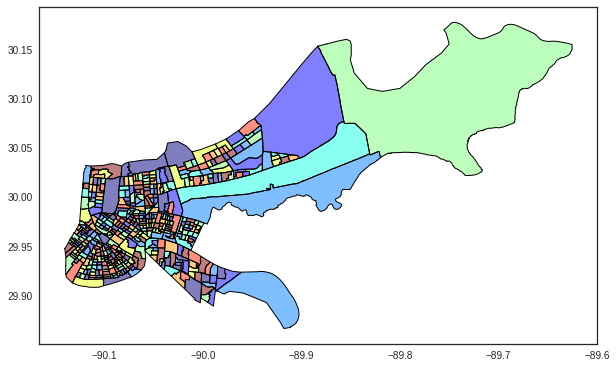

In [35]:
df_nola.plot(figsize=(10,10), cmap="jet");

In [36]:
len(df_nola)

496

### Get wealth info for NOLA

In [37]:
fiona.listlayers(filepath)

[u'ACS_2015_5YR_BG_22_LOUISIANA',
 u'X00_COUNTS',
 u'X01_AGE_AND_SEX',
 u'X02_RACE',
 u'X03_HISPANIC_OR_LATINO_ORIGIN',
 u'X07_MIGRATION',
 u'X08_COMMUTING',
 u'X09_CHILDREN_HOUSEHOLD_RELATIONSHIP',
 u'X11_HOUSEHOLD_FAMILY_SUBFAMILIES',
 u'X12_MARITAL_STATUS_AND_HISTORY',
 u'X14_SCHOOL_ENROLLMENT',
 u'X15_EDUCATIONAL_ATTAINMENT',
 u'X16_LANGUAGE_SPOKEN_AT_HOME',
 u'X17_POVERTY',
 u'X19_INCOME',
 u'X20_EARNINGS',
 u'X21_VETERAN_STATUS',
 u'X22_FOOD_STAMPS',
 u'X23_EMPLOYMENT_STATUS',
 u'X24_INDUSTRY_OCCUPATION',
 u'X25_HOUSING_CHARACTERISTICS',
 u'X27_HEALTH_INSURANCE',
 u'X99_IMPUTATION',
 u'BG_METADATA_2015']

In [38]:
df_income = gpd.read_file(filepath, layer="X19_INCOME");
df_income.head()

,B19001e1,B19001e10,B19001e11,B19001e12,B19001e13,B19001e14,B19001e15,B19001e16,B19001e17,B19001e2,...,B19313Ge1,B19313Gm1,B19313He1,B19313Hm1,B19313Ie1,B19313Im1,B19313e1,B19313m1,GEOID,geometry
0,471,0,89,14,77,0,0,0,0,0,...,NaN,NaN,18009700.0,8232649.0,NaN,NaN,19944700.0,8367632.0,15000US220019601001,None
1,538,0,16,70,30,0,0,0,14,114,...,NaN,NaN,8332800.0,5596518.0,NaN,NaN,20598900.0,9060616.0,15000US220019601002,None
2,232,0,11,11,77,0,11,0,37,14,...,NaN,NaN,21451500.0,13544675.0,NaN,NaN,21451500.0,13544675.0,15000US220019601003,None
3,612,116,8,56,0,0,24,23,0,36,...,NaN,NaN,25112600.0,9203330.0,NaN,NaN,28692400.0,9807801.0,15000US220019601004,None
4,419,50,14,8,85,0,31,26,0,61,...,NaN,NaN,22091200.0,8181027.0,NaN,NaN,25241000.0,8902464.0,15000US220019601005,None


In [50]:
df_metadata = gpd.read_file(filepath, layer="BG_METADATA_2015");
df_metadata[df_metadata.Short_Name=='B19013e1'].Full_Name.values

array([ u'MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2015 INFLATION-ADJUSTED DOLLARS): Total: Households -- (Estimate)'], dtype=object)

In [51]:
df_geo = pd.DataFrame()
df_geo['GEOID'] = df_nola.GEOID_Data
df_geo['GEOID'] = df_geo['GEOID'].astype('str')

In [52]:
df_geo['geometry'] = df_nola.geometry

In [53]:
df_geo = pd.merge(df_geo, df_income[['GEOID','B19013e1']],on='GEOID',how='inner')

In [54]:
df_geo.rename(columns={'B19013e1': 'MEDIAN_INCOME'}, inplace=True)

In [55]:
df_geo.head()

,GEOID,geometry,MEDIAN_INCOME
0,15000US220710120002,(POLYGON ((-90.13078900041199 29.9351190004415...,109583.0
1,15000US220710103004,(POLYGON ((-90.10418700032977 29.9487019999973...,34167.0
2,15000US220710033086,(POLYGON ((-90.0689830001653 29.99907600005741...,NaN
3,15000US220710131004,(POLYGON ((-90.13629299972212 29.9541549996535...,19539.0
4,15000US220710140004,(POLYGON ((-90.08726999991052 29.9476979995631...,9844.0


In [56]:
len(df_geo)

496

In [57]:
# Missing income info
len(df_geo[df_geo.MEDIAN_INCOME.isnull()])

35

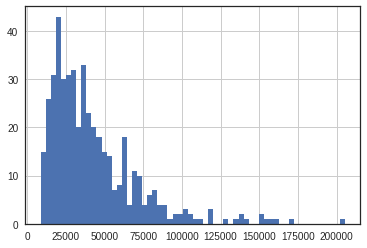

In [58]:
df_geo["MEDIAN_INCOME"].hist(bins=60)

#### Add GEOID to dataset

In [59]:
df_cfs['GEOID'] = ["0" for i in range(len(df_cfs))]

In [60]:
df_cfs['MEDIAN_INCOME'] = ["0" for i in range(len(df_cfs))]

In [61]:
df_cfs.head()

,NOPD_Item,TimeCreate,TimeDispatch,TimeArrive,TimeClosed,Beat,Zip,Description,Latitude,Longitude,DOW,Month,DOM,Year,Hour,DOY,GEOID,MEDIAN_INCOME
0,A0026112,2012-01-01 01:44:00,1/1/2012 1:45,1/1/2012 1:47,1/1/2012 3:37,8D02,70112.0,SIMPLE ROBBERY,29.956609,-90.071701,6,1,1,2012,1,1,0,0
1,A0139412,2012-01-01 20:04:00,1/1/2012 20:08,1/1/2012 20:10,1/1/2012 22:35,8B01,70130.0,SIMPLE ROBBERY,29.951030,-90.065579,6,1,1,2012,20,1,0,0
2,A0163512,2012-01-02 00:13:00,1/2/2012 0:16,1/2/2012 0:23,1/2/2012 1:30,8E01,70116.0,SIMPLE ROBBERY,29.959471,-90.064802,0,1,2,2012,0,2,0,0
3,A0195712,2012-01-02 09:12:00,1/2/2012 9:14,1/2/2012 9:24,1/2/2012 10:32,2F04,70115.0,SIMPLE ROBBERY,29.920467,-90.106176,0,1,2,2012,9,2,0,0
4,A0248912,2012-01-02 17:25:00,1/2/2012 17:44,1/2/2012 17:52,1/2/2012 20:16,5Q02,70126.0,SIMPLE ROBBERY,29.987330,-90.033363,0,1,2,2012,17,2,0,0


In [62]:
len(df_cfs)

13927

In [63]:
match = []
for o in range(len(df_geo)): # loop over NOLA BG = 496

    count = 0
    for i in range(len(df_cfs)): # loop over Crime Info = 13,927
        if df_cfs.GEOID[i] == "0":
            
            point = shapely.geometry.Point(df_cfs.Longitude[i], df_cfs.Latitude[i]) # longitude, latitude
    
            if point.within(df_geo.geometry[o]):
                df_cfs.loc[i,'GEOID'] = df_geo.GEOID[o]
                df_cfs.loc[i,'MEDIAN_INCOME'] = df_geo.MEDIAN_INCOME[o]
                count += 1
                
    if o%100 == 0:
        print o
        
    match.append(count)

0
100
200
300
400


In [64]:
df_cfs.head()

,NOPD_Item,TimeCreate,TimeDispatch,TimeArrive,TimeClosed,Beat,Zip,Description,Latitude,Longitude,DOW,Month,DOM,Year,Hour,DOY,GEOID,MEDIAN_INCOME
0,A0026112,2012-01-01 01:44:00,1/1/2012 1:45,1/1/2012 1:47,1/1/2012 3:37,8D02,70112.0,SIMPLE ROBBERY,29.956609,-90.071701,6,1,1,2012,1,1,15000US220710135001,70143
1,A0139412,2012-01-01 20:04:00,1/1/2012 20:08,1/1/2012 20:10,1/1/2012 22:35,8B01,70130.0,SIMPLE ROBBERY,29.951030,-90.065579,6,1,1,2012,20,1,15000US220710135001,70143
2,A0163512,2012-01-02 00:13:00,1/2/2012 0:16,1/2/2012 0:23,1/2/2012 1:30,8E01,70116.0,SIMPLE ROBBERY,29.959471,-90.064802,0,1,2,2012,0,2,15000US220710135002,82361
3,A0195712,2012-01-02 09:12:00,1/2/2012 9:14,1/2/2012 9:24,1/2/2012 10:32,2F04,70115.0,SIMPLE ROBBERY,29.920467,-90.106176,0,1,2,2012,9,2,15000US220710107002,67697
4,A0248912,2012-01-02 17:25:00,1/2/2012 17:44,1/2/2012 17:52,1/2/2012 20:16,5Q02,70126.0,SIMPLE ROBBERY,29.987330,-90.033363,0,1,2,2012,17,2,15000US220710137003,9205


In [65]:
fullpath = "../Datasets/Geospatial_Data/NOLA_census_info.csv"
df_cfs.to_csv(fullpath, sep=',',  index = False)

In [66]:
len(df_cfs[df_cfs.GEOID=='0'])

1433

#### Filter incorrect geo codes, verify logic to generate data!

In [68]:
df_final = df_cfs[df_cfs.GEOID!='0']

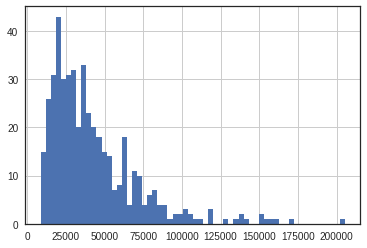

In [76]:
df_geo["MEDIAN_INCOME"].hist(bins=60)

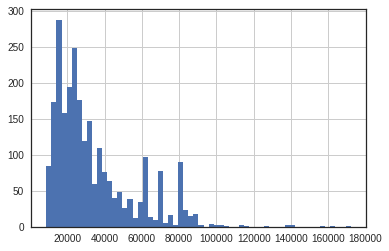

In [74]:
df_final[df_final.Year==2015].MEDIAN_INCOME.hist(bins=60)

## Geospatial Visualization of Violent Crime

In [86]:
map_nola = folium.Map(location=[29.956609, -90.071701], zoom_start=10)
map_nola

In [77]:
df_cfs_2016 = df_final[df_final.Year==2015]

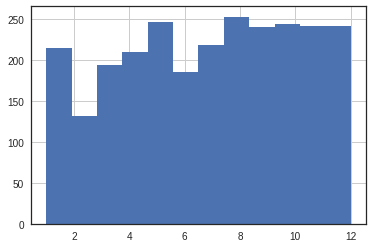

In [78]:
df_cfs_2016.Month.hist(bins=12)

In [79]:
df_cfs_2016 = df_cfs_2016[df_cfs_2016.Month==12]
df_cfs_2016.reset_index(drop=True, inplace=True)
len(df_cfs_2016)

242

In [87]:
for i in range(len(df_cfs_2016)):
    folium.RegularPolygonMarker([df_cfs_2016.Latitude[i], df_cfs.Longitude[i]], \
                                popup=df_cfs.Description[i], fill_color='Red', \
                                number_of_sides=3, radius=5).add_to(map_nola)
map_nola